# 调用sklearn库版本

In [1]:
# 导入必要的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来显示正常负号

In [2]:
# 导入波士顿房价的数据集
data = pd.read_csv('house_data.csv')

# 数据预处理
X = data.drop('MEDV', axis=1)  # 特征矩阵
y = data['MEDV']  # 目标变量

# 标准化特征
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# 最小二乘法

In [3]:
# 创建线性回归模型
lin_reg = LinearRegression()

# 拟合模型
lin_reg.fit(X_scaled, y)

LinearRegression()

In [4]:
# 获取回归系数和截距
theta_best_sklearn = lin_reg.coef_
intercept_best_sklearn = lin_reg.intercept_

In [5]:
# 打印模型参数
print(f"最小二乘法模型的回归系数：{theta_best_sklearn}")
print(f"最小二乘法模型的截距：{intercept_best_sklearn}")

最小二乘法模型的回归系数：[-0.92814606  1.08156863  0.1409      0.68173972 -2.05671827  2.67423017
  0.01946607 -3.10404426  2.66221764 -2.07678168 -2.06060666  0.84926842
 -3.74362713]
最小二乘法模型的截距：22.532806324110677


In [6]:
# 预测值
predictions_sklearn = lin_reg.predict(X_scaled)

In [7]:
print(predictions_sklearn)

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205 19.29748321 20.52750979 16.91140135
 16.17801106 18.40613603 12.52385753 17.67103669 15.83288129 13.80628535
 15.67833832 13.38668561 15.46397655 14.70847428 19.54737285 20.8764282
 11.45511759 18.05923295  8.81105736 14.28275814 13.70675891 23.81463526
 22.34193708 23.10891142 22.91502612 31.35762569 34.21510225 28.02056414
 25.20386628 24.60979273 22.94149176 22.09669817 20.42320032 18.03655088
  9.10655377 17.20607751 21.28152535 23.97222285 27.6558508  24.04901809
 15.3618477  31.15264947 24.85686978 33.10919806 21.77537987 21.08493555
 17.8725804  18.51110208 23.98742856 22.55408869 23.37308644 30.36148358
 25.53056512 21.11338564 17.42153786 20.78483633 25.20148859 21.7426577
 24.55744957 24.04295712 25.50499716 23.9669302  22.94545403 23.35699818
 21.26198266 22.42817373 28.40576968 26.99486086 26.0

In [8]:
# 计算代价函数值 (均方误差)
cost_sklearn = np.mean((predictions_sklearn - y) ** 2)
print(f"均方误差 (MSE): {cost_sklearn}")

均方误差 (MSE): 21.894831181729206


# 数据可视化

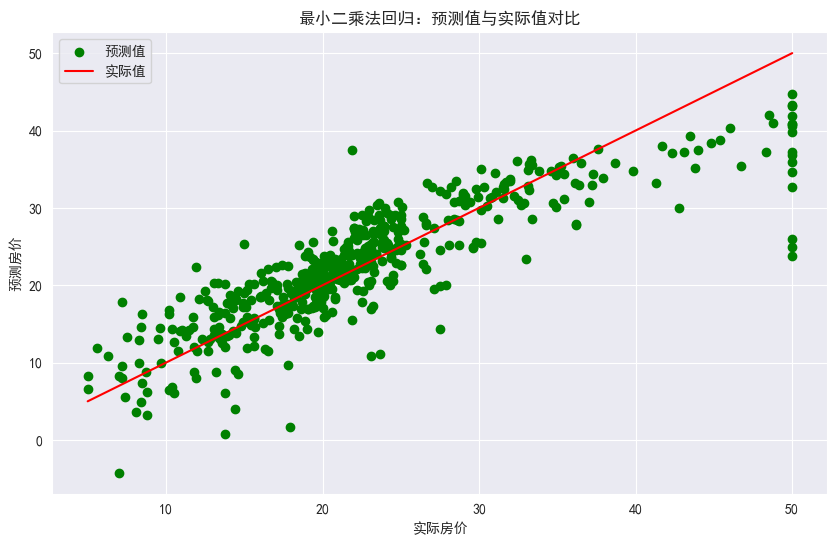

In [9]:
# 绘制预测值与真实值的对比
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions_sklearn, color='green', label='预测值')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='实际值')
plt.xlabel('实际房价')
plt.ylabel('预测房价')
plt.title('最小二乘法回归：预测值与实际值对比')
plt.legend()
plt.show()

# 梯度下降算法

In [10]:
# 创建SGDRegressor模型（梯度下降法）
sgd_regressor = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01)

# 拟合模型
sgd_regressor.fit(X_scaled, y)


SGDRegressor(learning_rate='constant')

In [11]:
# 获取回归系数和截距
theta_best_sgd = sgd_regressor.coef_
intercept_best_sgd = sgd_regressor.intercept_

In [12]:
# 打印模型参数
print(f"SGDRegressor回归系数：{theta_best_sgd}")
print(f"SGDRegressor截距：{intercept_best_sgd}")


SGDRegressor回归系数：[-0.77960098  0.9274447  -0.01541875  0.64344777 -2.33753375  2.48943247
 -0.34116742 -3.23456802  2.92542262 -1.67698382 -1.63512082  1.12921696
 -4.34587441]
SGDRegressor截距：[22.81699494]


In [13]:
# 预测值
predictions_sgd = sgd_regressor.predict(X_scaled)

In [14]:
print(predictions_sgd)

[30.00781626 25.06087904 31.04893494 29.66154156 28.65691679 26.10165431
 22.49381899 18.02102451  9.15251339 17.68274942 17.30726181 20.76280643
 20.49921229 20.6851993  19.88069446 20.51928882 22.21155339 17.2359829
 17.20200602 19.28310742 12.21801014 18.01108271 15.70364311 13.54049315
 15.73755848 13.34056986 15.6544988  14.45080565 19.72524426 21.16113483
 10.95010988 18.24939433  7.59539838 14.15187452 12.95014044 24.5769932
 23.00979612 24.27701962 24.07908086 32.30515702 35.32424864 29.30449342
 26.51066764 25.80356461 23.54871262 22.89199421 20.86520894 17.3037335
  7.40229654 17.0946946  21.21429058 23.97681047 28.45303197 24.71142509
 16.25036879 31.60251238 25.2741635  32.95347464 23.09237025 22.1022346
 18.34051522 18.43543873 24.79338866 23.30791797 23.5622134  31.16941015
 25.83027673 22.62743904 18.39507427 22.09336791 26.84618468 23.08123352
 26.40282904 25.65055849 27.33712071 25.06195398 23.40689455 24.40480227
 21.94995081 23.76507021 29.61963717 27.59717693 27.257

In [15]:
# 计算均方误差 (MSE)
cost_sgd = np.mean((predictions_sgd - y) ** 2)
print(f"均方误差 (MSE): {cost_sgd}")

均方误差 (MSE): 22.821069132994328


# 数据可视化

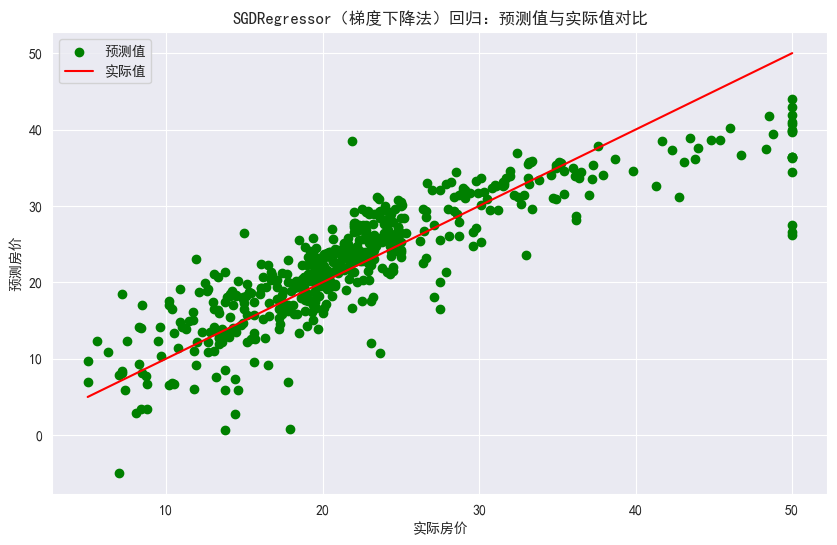

In [16]:
# 绘制预测值与真实值的对比
plt.figure(figsize=(10, 6))
plt.scatter(y, predictions_sgd, color='green', label='预测值')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='实际值')
plt.xlabel('实际房价')
plt.ylabel('预测房价')
plt.title('SGDRegressor（梯度下降法）回归：预测值与实际值对比')
plt.legend()